# Fitting models to data - straight line fitting

Version 0.1 Sep 2019

A common data interpretation task is to formulate a mathematical model and fit that model to experimental data. One of the simplest and most used ways of doing this is called _Linear least squares regression_. This is a method of finding the straight line that best fits a set of data points.  It is frequently also referred to as _regression_ , _linear regression_ or _least squares_ .

In the least squares method we have a mathematical model, defined with a number of parameters, and some data points. As an example, a straight line can be modelled by the familiar equation $y = mx + c$ which has two parameters: $m$ (the gradient of the line) and $c$ (the intercept). 

The regression process is one of optimising the fit of the line to the data by establishing the values for the parameters defining the line that minimise the sum of the squared distances between the data points and the straight line model.

In this notebook, we'll explore how to do this using some of the fitting tools and functions available with Python.



## 0 Imports and housekeeping

As usual, one of the first tasks is to import the necessary packages - these include the familiar packages NumPy, Pandas and Matplotlib.  In later cells we will also make use of SciPy for the actual line fitting. 

Results are persistent from one cell to another, so remember to run cells in sequence.  Most importantly, we need to import packages before using them.  The next cell does this, as well as setting up some other items that we will use later.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# These two lines enable formatted printing of Pandas DataFrames
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



## 1 Data inspection

For the exercises in this notebook, a file with data is provided.  `LineData.csv` is a csv file that can be read in using Pandas in the usual way. 

This is designed to represent typical experimental data that might be modelled with a straight line. There are 4 columns - `xdat` and `ydat`, which are the $x$ and $y$ values, and `xerr` and `yerr` which are the estimated errors on the $x$ and $y$ data points.

As in previous examples, the first task is data inspection, so we will start by reading in the file, inspecting the contents of the resulting DataFrame and making a plot of the raw data.


In [ ]:
# Read in the data
LineData = pd.read_csv('LineData.csv')

# Display first few lines of the dataset
LineData.head()

# Define variables to refer to the x and y data columns
#  - not strictly necessary, but convenient
x  = LineData['xdat']
y  = LineData['ydat']

#Set the size of subsequent plots
plt.rcParams['figure.figsize'] = [12, 7.42]
plt.scatter(x, y)

##  2 Line fitting using linear regression

These data points look as though a straight line will fit.  We can use linear regression to find the line of best fit.

This can be done easily using a SciPy function: `scipy.stats.linregress()`, which carries out a linear regression.  As the name implies, this is part of the SciPy library's `stats` package. 

Linregress() takes two columns of data (representing $x$ and $y$ values) and returns the parameters of the least squares fit.  These are the slope $m$ and intercept $c$ of the fitted straight line, together with some additional parameters:

**rvalue**:     The _correlation coefficient_ - a measure of goodness of fit

**pvalue**:     A statistical test - not used here
   
**stderr**:     The standard error (+/-) on the fitted gradient 

Full documentation of the linregress() function is available on the SciPy website:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

The program segment in the next cell uses the $x$ and $y$ values from LineData.csv, together with the imported packages NumPy, Pandas and Matplotlib so remember to run the previous cells first.


In [ ]:
# first need to import the linregress() function
from scipy.stats import linregress

# This single line does the linear regression fit
m, c, r, p, stderr = linregress(x, y)

print(f'Gradient: {m:.2f} +/- {stderr:.2f}, Intercept: {c:.2f}')
print(f'Correlation coefficient: {r:.3f}')

# Plot the line on to the data:
xstart = x.min() - 0.5                 # calculate start and end x values
xend   = x.max() + 0.5                 # for plotting the fitted line 
xlin   = np.linspace(xstart, xend, 50) # create array of x values for the line
ylin   = m*xlin+c                      # generate the y values for the straight line

plt.scatter(x, y)                      # plot the data points

plt.plot(xlin, ylin, color = 'red')    # plot the fitted line 

## 3 Getting more detailed statistical information

The statistical information returned by linregress() is sufficient for many purposes, but it is limited to straight line fits, and also returns limited information (for instance, although linregress() calculates the correlation coefficient and the +/- on the gradient, it does not calculate a +/- on the intercept).

To fit nonlinear functions, and to obtain more detailed statistical information we can use another SciPy function - `scipy.optimize.curve_fit()`.

This is a much more general function than linregress() and allows you to define a model function to be fitted - it is not constrained to a straight line.  In this case, we do actually want a straight line but in other situations it could be some other function such as $y = A x^2$ 

For use with curve_fit() the model function is defined in a specific manner as a _callable_ function.  This is called by curve_fit() once for each $x$ value. The result is compared each time with the corresponding $y$ value in the supplied data in order to calculate the sum of the squares.  The remaining parameters in the model function (in this case the gradient $m$ and intercept $c$) are provided by curve_fit() and adjusted to minimise the sum of squares.

curvefit() returns two objects, one (`popt`) containing the optimised parameters to the model (i.e. the best fit values of $m$ and $c$ in this case) and a _covariance matrix_ (`pcov`) that contains statistical data relating to the fit. 

The covariance matrix contains two rows of data.  The diagonals of this matrix contain the _squares_ of the errors in $m$ and $c$.  Taking the square roots of these values gives an array, `perr`, containing the +/- on the gradient $m$ and the +/- on the intercept $c$.

For more information on the covariance matrix, refer to the curve_fit() documentation:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

As usual it's probably easiest to present this as an example - using the data from the previous cells.

In [ ]:
from scipy.optimize import curve_fit

# Define a simple, straight line model, accepting an x value or 1D array and using 
# gradient and intercept parameters supplied by curvefit(). 
#
# If the first parameter (x) is a NumPy array or Pandas series 
# the function will return a corresponding array of y values.
def StrtLineModel(x, m, c):
    y_lin = m*x + c
    return (y_lin)

# Call the fitting function - which returns two objects. The variables 'popt' and 'pcov' 
# are called this by convention but any names would do.
popt, pcov = curve_fit(StrtLineModel, x, y)

# if you are interested, un-comment the following  line to print out the
# covariance matrix and see how it works
print(pcov)

# Calculate the errors on the returned parameters
perr = np.sqrt(np.diag(pcov)) # squares of the error values are 
                              # on the covariance matrix diagonal

# For readability, extract values from popt and perr into named variables
m_fit = popt[0]
c_fit = popt[1]
m_err = perr[0]
c_err = perr[1]
    
# Now we can print out the optimised fit parameters and 1-sigma estimates
print('fit parameter 1-sigma error')
print('***************************************************')
print (f'm = {m_fit:.2f} +/- {m_err:.2f}')
print (f'c = {c_fit:.2f} +/- {c_err:.2f}')
print('***************************************************')

# Now plot the data and add the optimised line. 
# This time we already have a function defined to 
# calculate the straight line - called this time with the optimised 
# parameters returned by curvefit()

plt.scatter(x, y)
plt.plot(x, StrtLineModel(x, m_fit, c_fit), color = 'red')


## 4 What if we have estimated errors on the y axis?

Experimental data often has (in fact, ought to have) estimates of how accurate the measurement is - each data point has associated errors. 

Simple functions like linregress() treat all data points as equal. However, it's reasonable to suppose that data points with small errors should be weighted more than those with large estimated errors. Fortunately there are algorithms that do just that.

Scipy.optimize.curve_fit() allows us to utilise the error estimates in $y$ that we have in the data. The SciPy method takes the model function you define along with the data points in $x$ and $y$, plus an array containing the $y$ errors. The parameter `absolute_sigma = True` tells the function that we are passing it absolute errors.

In the following two cells we will first plot the data with error bars, and then find the optimised fit using curve_fit(), this time taking account of the $y$ errors.

In [ ]:
# First obtain y error from the DataFrame we've already read in from LineData.csv
yerror = LineData['yerr']

# matplotlib makes it easy to plot with error bars
plt.errorbar(x, y, yerr = yerror, capsize = 2, fmt = 'o')



The next cell calculates the fit parameters. 



In [ ]:
# Once again, define a straight line model function.
def StrtLineModel(x, m, c):
    y_lin = m*x + c
    return (y_lin)

# Call the fitting function, which returns two objects. The variables 'popt' and 'pcov' 
# are called this by convention but any names would do.
popt, pcov = curve_fit(StrtLineModel, x, y, sigma = yerror, absolute_sigma = True)

# Calculate the accuracy of the returned parameters
perr = np.sqrt(np.diag(pcov)) # squares of the error values are 
                              # on the covariance matrix diagonal
    
# For readability, extract values from popt and perr into named variables
m_fit = popt[0]
c_fit = popt[1]
m_err = perr[0]
c_err = perr[1]

#print fit parameters and 1-sigma estimates
print('fit parameter 1-sigma error')
print('***************************************************')
print (f'm = {m_fit:.2f} +- {m_err:.2f}')
print (f'c = {c_fit:.2f} +- {c_err:.2f}')
print('***************************************************')



## 4.1 Exercise - plot fitted line

Having calculated the new fit parameters, create a new plot showing the data points with error bars, together with the fitted line. 

Enter your solution in the next cell.  Once plotted, compare this with the original fit from Sections 2 and 3.

In [ ]:
# Write your solution here
# matplotlib makes it easy to plot with error bars
plt.errorbar(x, y, yerr = yerror, capsize = 2, fmt = 'o')

plt.plot(x, StrtLineModel(x, m_fit, c_fit), color = 'red')

## 4.2 Confidence bounds or limits

Now that we have values in `perr` for the errors on the gradient and the intercept we can use this information to show a set of confidence limits around the best fit line.

For this example, the upper and lower limit lines are calculated using the upper and lower values of the intercept, and the upper and lower values of the gradient.

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'x vs y with best fit line and 1 sigma confidence')

<ErrorbarContainer object of 3 artists>

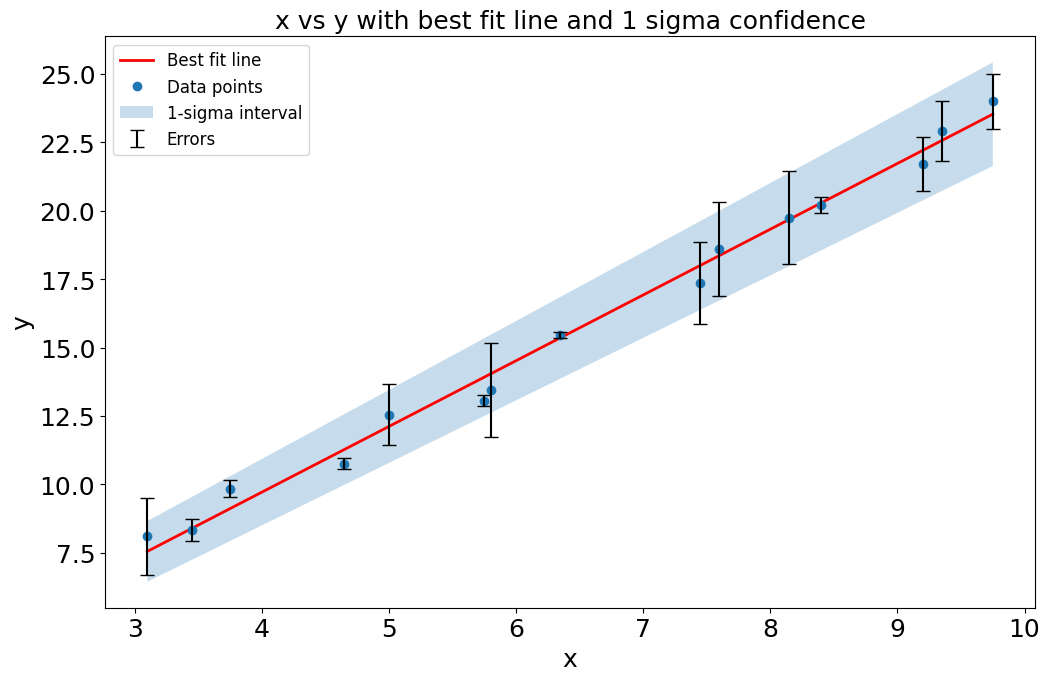

In [45]:
# prepare confidence level line limits
nstd = 1.0 # to draw 1 sigma interval

# Calculate m and c values for upper and lower limit lines
# These are NumPy arrays so can carry out array calculations on them
# - print them out if you want, to inspect the contents
popt_upper = popt + nstd*perr
popt_lower = popt - nstd*perr

# Calculate y values of the fitted line
y_fit = StrtLineModel(x, *popt)

# Calculate y values of upper and lower bound lines
fit_upper = StrtLineModel(x, *popt_upper)
fit_lower = StrtLineModel(x, *popt_lower)

# To make a labelled plot, need access to the 
# figure and axes objects:
fig, ax = plt.subplots(1)

# Set plot parameters
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size'] = 2

# axis labels and title
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.title('x vs y with best fit line and 1 sigma confidence', fontsize = 18)

# plot the best fit line, data points and error bars
plt.plot(x, y_fit, 'r', lw = 2, label = 'Best fit line')
plt.plot(x, y, 'o', lw = 2, label = 'Data points')
plt.errorbar(x, y, yerr = yerror, capsize = 5, fmt = 'none', ecolor = 'k', label = 'Errors')

# Draw shaded area between upper and lower limit lines
ax.fill_between(x, fit_upper, fit_lower, alpha = .25, label = '1-sigma interval')

plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

## 4.3 Exercise - plot maximum and minimum gradient lines

Instead of plotting upper and lower limit lines, as in the previous cell, create a plot showing the maximum and minimum gradient lines. Enter your solution in the next cell. Once plotted, compare with the plot with upper and lower bounds in the previous cell.

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'x vs y with best fit line and 1 sigma confidence')

<ErrorbarContainer object of 3 artists>

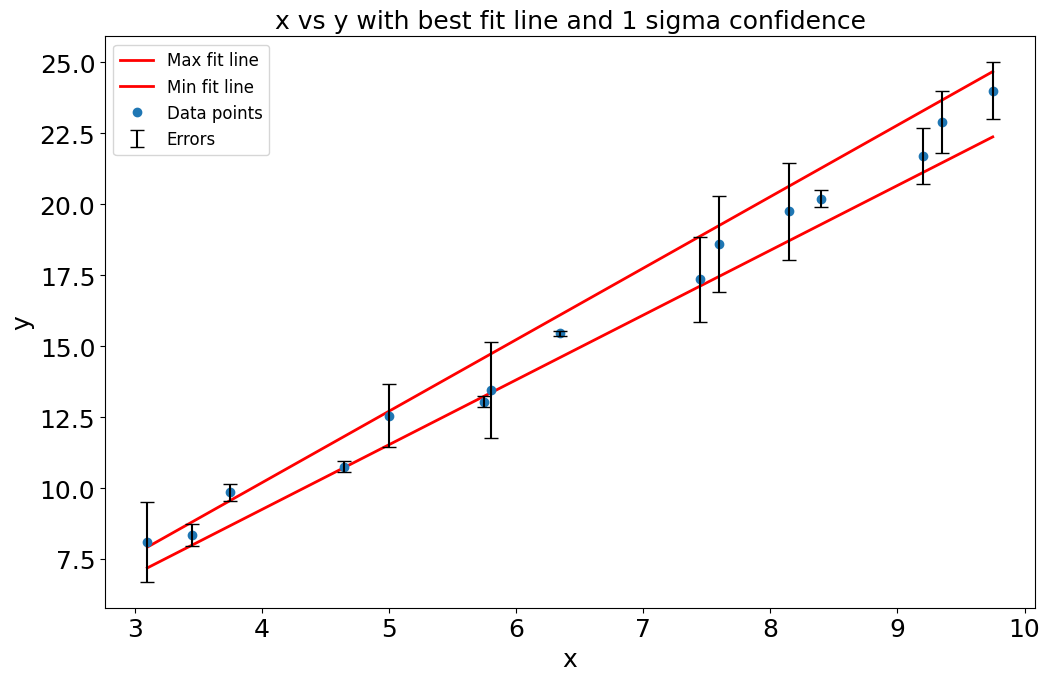

In [44]:


popt_upper = popt + np.array([1,0])*perr
popt_lower = popt - np.array([1,0])*perr

# Calculate y values of the fitted line
y_fit_max = StrtLineModel(x, *popt_upper)
y_fit_min = StrtLineModel(x, *popt_lower)

# To make a labelled plot, need access to the 
# figure and axes objects:
fig, ax = plt.subplots(1)

# Set plot parameters
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size'] = 2

# axis labels and title
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.title('x vs y with best fit line and 1 sigma confidence', fontsize = 18)

# plot the best fit line, data points and error bars
plt.plot(x, y_fit_max, 'r', lw = 2, label = 'Max fit line')
plt.plot(x, y_fit_min, 'r', lw = 2, label = 'Min fit line')

plt.plot(x, y, 'o', lw = 2, label = 'Data points')
plt.errorbar(x, y, yerr = yerror, capsize = 5, fmt = 'none', ecolor = 'k', label = 'Errors')

plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

## 5 Considering errors in both $x$ and $y$

So far we have considered only the errors in the $y$ values. Linear regression tries to minimise the sum of the squares and in curve_fit(), the error is only considered in the $y$ value residual measured to the fitted line. In other words curve_fit() minimises the residuals obtained by measuring a _vertical_ distance from the data point to the model line. 

This is fine unless we have errors in both $x$ and $y$. In this case it is better to use the _orthogonal_ distance from the data point to the fitted line (i.e. the distance measured at right angles to the line).  This technique is called _Orthogonal Distance Regression (ODR)_. 

Fortunately, SciPy contains a function, `scipy.odr()` that does this form of regression. 

To use `scipy.odr()` we need to define the model function in a slightly different way.  The details are in the SciPy documentation:

https://docs.scipy.org/doc/scipy/reference/odr.html


fit parameter 1-sigma error
***************************************************
m = 2.40 +- 0.12
c = 0.11 +- 0.74
***************************************************


<ErrorbarContainer object of 3 artists>

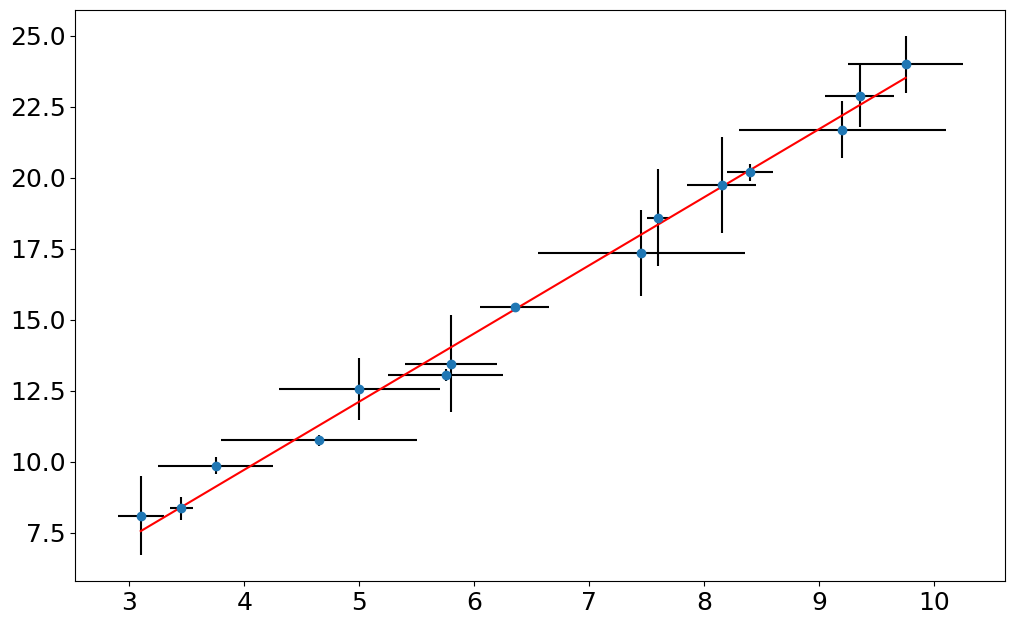

In [42]:
from scipy import odr
from scipy.stats import linregress

# Again we need to define a modelling function for the straight line
# This will be called from scipy.odr() in a similar way to curve_fit()
# BUT it is defined in a slightly different way to the function used in curve_fit()
# The parameters are contained in a list or tuple, p, and the x values 
# are supplied at the end, rather than as the first parameter
def StrtLineModelOdr(p, x):
    m, c = p  
    y_lin = m * x  + c
    return y_lin

# We need both the x and y errors
xerror = LineData['xerr']
yerror = LineData['yerr']

# Build model for fitting. 
model = odr.Model(StrtLineModelOdr)

# Form an odr RealData object
rdata = odr.RealData(x, y, sx = xerror, sy = yerror)
# Now set up the ODR, 
# We need an initial guess of m and c - beta0 
# We could hard wire this but as our model is a straight line,
# we can use scipy.stats.linregress() to get an estimate.
# The parameters needed are the slope and intercept (m and c)
init_guess = linregress(x, y)[0:2]

odr = odr.ODR(rdata, model, beta0 = init_guess )

# Run it and get the results
result_outputs = odr.run()

# Extract the data we need
popt = result_outputs.beta

# We can get a standard error using the line below (uncomment if you want to)
# perr = result_outputs.sd_beta
# But we'll use the covariance matrix to compute something closer to a 1 sigma confidence interval
perr = np.sqrt(np.diag(result_outputs.cov_beta))

# For readability, extract values from popt and perr into named variables
m_fit = popt[0]
c_fit = popt[1]
m_err = perr[0]
c_err = perr[1]

#print fit parameters and 1-sigma estimates
print('fit parameter 1-sigma error')
print('***************************************************')
print (f'm = {m_fit:.2f} +- {m_err:.2f}')
print (f'c = {c_fit:.2f} +- {c_err:.2f}')
print('***************************************************')

# Now plot the data and fitted line:
plt.errorbar(x, y, yerr = yerror, xerr = xerror, fmt = 'o', ecolor = 'k', label = 'Errors')
plt.plot(x, StrtLineModelOdr([m_fit, c_fit], x), color = 'red')


### 5.1 Exercise - plot fitted line

Expand the example in the previous cell to include a shaded area indicating the error bounds, as in 4.2.

Enter your solution in the next cell. Once plotted, compare this with the plot in 4.2.

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'x vs y with best fit line and 1 sigma confidence')

<ErrorbarContainer object of 3 artists>

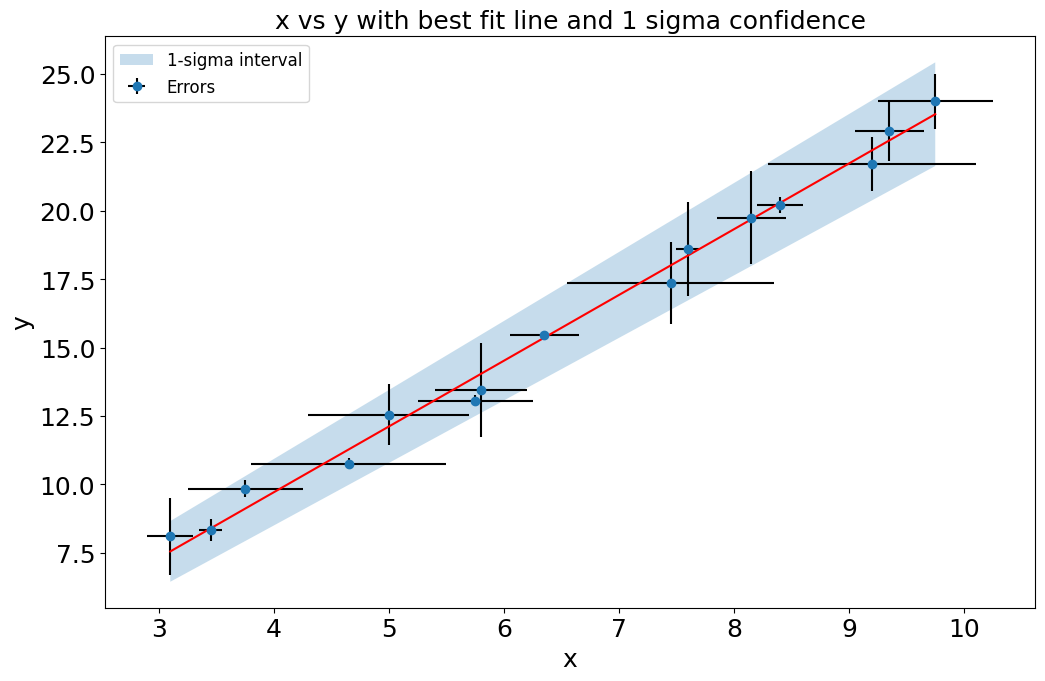

In [46]:
# prepare confidence level line limits
nstd = 1.0 # to draw 1 sigma interval

# Calculate m and c values for upper and lower limit lines
# These are NumPy arrays so can carry out array calculations on them
# - print them out if you want, to inspect the contents
popt_upper = popt + nstd*perr
popt_lower = popt - nstd*perr

# Calculate y values of the fitted lin

# Calculate y values of upper and lower bound lines
fit_upper = StrtLineModel(x, *popt_upper)
fit_lower = StrtLineModel(x, *popt_lower)

# To make a labelled plot, need access to the 
# figure and axes objects:
fig, ax = plt.subplots(1)

# Set plot parameters
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size'] = 2

# axis labels and title
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.title('x vs y with best fit line and 1 sigma confidence', fontsize = 18)

# Now plot the data and fitted line:
plt.errorbar(x, y, yerr = yerror, xerr = xerror, fmt = 'o', ecolor = 'k', label = 'Errors')
plt.plot(x, StrtLineModelOdr([m_fit, c_fit], x), color = 'red')

# Draw shaded area between upper and lower limit lines
ax.fill_between(x, fit_upper, fit_lower, alpha = .25, label = '1-sigma interval')

plt.legend(loc = 'upper left', fontsize = 12)
plt.show()
